In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json
from scipy.stats import multivariate_normal

/Users/deepprakashravi/.conda/envs/general-env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Path to the JSON file
file_path = './gmm_data.json'

# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Now `data` is a Python dictionary containing the parsed JSON
print(data)

{'weights': [0.17112196851951791, 0.16780991219353047, 0.3019443027238607, 0.12422501638085014, 0.15435808763471748, 0.08054071254752335], 'means': [[3.805339327327756, 0.4325730052302514, -0.40210788652867246, 0.14823029855484715, -0.03666384439805498, 0.016694250071092983, 0.10409789176108371, 0.004572140130347716], [-0.6808779626088171, 1.480994141939289, 1.0147577530698235, -0.007970067549053435, 0.003057594499226558, 0.0020191333703820486, -0.005533584970304882, -0.0024531087270458093], [-3.9152925283513125, -0.4437827250280842, 0.1050971816707709, 0.026356041436778156, 0.025908091888512487, -0.0004610753698911964, 0.009434651063967433, 0.005267309491668505], [1.102533116095576, 0.5384056332186696, -0.5449217274298673, 0.003938040886947579, 0.048701135868218504, -0.012313544072633527, -0.04409075564204091, 0.005724400085166869], [-2.6985074437184027, -0.032467571145181465, -0.2023243460875314, -0.09915935098260323, -0.10032814201970819, 0.007169796996817286, -0.00813508276888127, 

In [3]:
for key, values in data.items():
    print(key)

weights
means
cov


In [4]:
means=[]
covariances=[]
for i in range(len(data["means"])):
    means.append(data["means"][i])
    covariances.append(data["cov"][i])

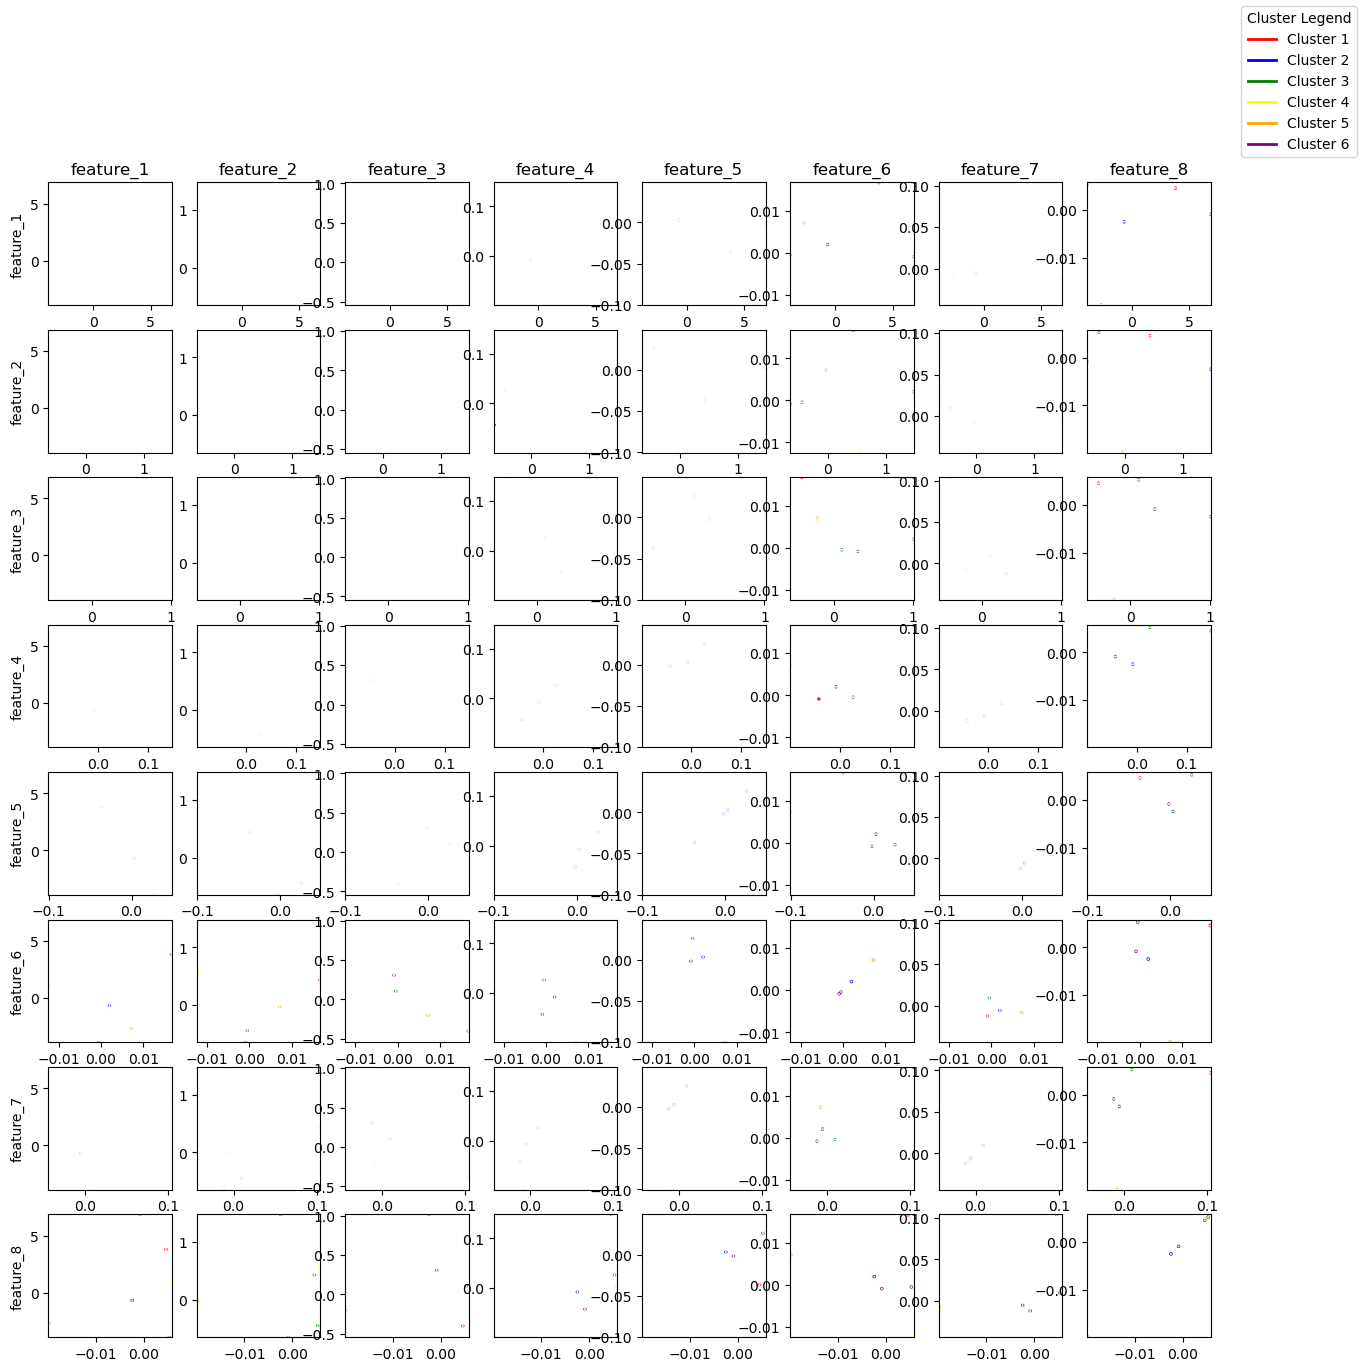

In [6]:


K = len(data["weights"]) # Number of cluster
D = len(means[0])  # 8 Dimesion of feature space

n =1 # how far in terms of std you want to plot

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=D, ncols=D, figsize=(15, 15))
label_to_color = { 0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange', 5: 'purple'}

for i in range(K):
    # Create different plot of each cluster
    for j in range(D):
        for k in range(D):
            if j==k:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.diag([covariances[i][j][j], covariances[i][k][k]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                axes[j][k].contour(x, y, pdf, levels=1,colors=label_to_color[i], linewidths=2)
                
                
            else:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.array([[covariances[i][j][j],covariances[i][j][k]],[covariances[i][k][j], covariances[i][k][k]]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                axes[j][k].contour(x, y, pdf, levels=1, colors=label_to_color[i], linewidths=2)
                
            #
                
            if j==0:
                axes[j][k].set_title(f'feature_{k+1}')
            if k==0:
                axes[j][k].set_ylabel(f'feature_{j+1}')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=color, lw=2, label=f'Cluster {i + 1}')
                   for i, color in label_to_color.items()]
# Add a legend
lines = [] 
labels = [] 
  
for ax in fig.axes: 
    Line, Label = ax.get_legend_handles_labels() 
    lines.extend(Line) 
    labels.extend(Label)
fig.legend(handles=legend_elements, loc='upper right', title='Cluster Legend')

plt.show() 